In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./results/mdi_local.two_subgroups_linear_sims/varying_heritability_sample_row_n/seed331/results.csv")

In [3]:
methods = ["MDI_all_stumps", "MDI_sub_stumps", "Permutation", "TreeSHAP", "LIME"]
sample_row_n = df["n"].unique().tolist()
sample_row_n.sort()
heritability = df["heritability"].unique().tolist()
heritability.sort()
nreps = df["rep"].max()
results = {}
for r in range(nreps+1):
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["auroc_group1"] = []
            results[r][h][m]["auroc_group2"] = []

In [4]:
for r in range(nreps+1):
    for h in heritability:
        for m in methods:
            for s in sample_row_n:
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group2"].unique()) == 1
                assert len(df_sub["rocauc_group1"].unique()) == 1
                results[r][h][m]["auroc_group1"].append(df_sub["rocauc_group1"].unique()[0])
                results[r][h][m]["auroc_group2"].append(df_sub["rocauc_group2"].unique()[0])

In [5]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["auroc_group1"] = []
        agg_results[h][m]["auroc_group2"] = []

In [6]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            agg_group1 = 0
            agg_group2 = 0
            for r in range(nreps+1):
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group2"].unique()) == 1
                assert len(df_sub["rocauc_group1"].unique()) == 1
                agg_group1 += df_sub["rocauc_group1"].unique()[0]
                agg_group2 += df_sub["rocauc_group2"].unique()[0]
            agg_group1 /= (nreps+1)
            agg_group2 /= (nreps+1)
            agg_results[h][m]["auroc_group1"].append(agg_group1)
            agg_results[h][m]["auroc_group2"].append(agg_group2)

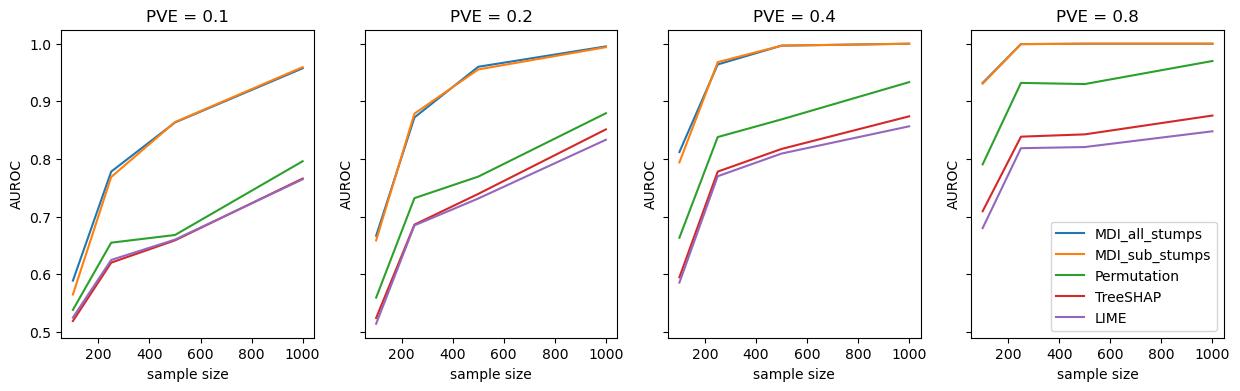

In [7]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1"], label=m)
    
    
# Set labels and title
axs[0].set_xlabel('sample size')
axs[0].set_ylabel('AUROC')
axs[0].set_title('PVE = 0.1')

axs[1].set_xlabel('sample size')
axs[1].set_ylabel('AUROC')
axs[1].set_title('PVE = 0.2')

axs[2].set_xlabel('sample size')
axs[2].set_ylabel('AUROC')
axs[2].set_title('PVE = 0.4')

axs[3].set_xlabel('sample size')
axs[3].set_ylabel('AUROC')
axs[3].set_title('PVE = 0.8')

# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()

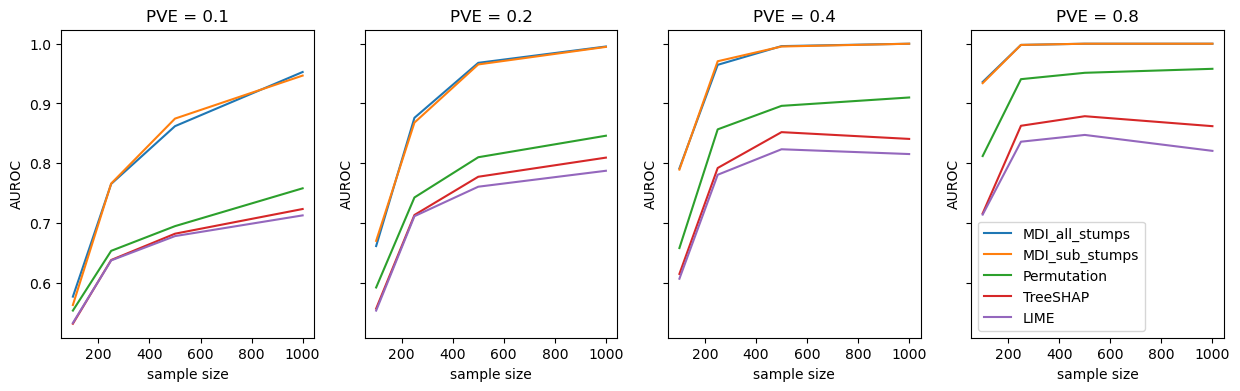

In [13]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2"], label=m)
    
    
# Set labels and title
axs[0].set_xlabel('sample size')
axs[0].set_ylabel('AUROC')
axs[0].set_title('PVE = 0.1')

axs[1].set_xlabel('sample size')
axs[1].set_ylabel('AUROC')
axs[1].set_title('PVE = 0.2')

axs[2].set_xlabel('sample size')
axs[2].set_ylabel('AUROC')
axs[2].set_title('PVE = 0.4')

axs[3].set_xlabel('sample size')
axs[3].set_ylabel('AUROC')
axs[3].set_title('PVE = 0.8')

# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()

In [12]:
import pickle
dic = pickle.load(open("/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.two_subgroups_linear_sims/varying_heritability_sample_row_n/seed331/0.1_1000/rep0/RF_MDI_sub_stumps_comparisons.pkl", "rb"))
dic["df"]["fi_scores"].iloc[0]

,var,local_fi_score_group1_mean,local_fi_score_group2_mean,true_support_group1,true_support_group2,cor_with_signal_group1,cor_with_signal_group2
0,0,48.457155,50.331597,1.0,0.0,NaN,0.077228
1,1,49.371416,50.008135,1.0,0.0,NaN,0.139311
2,2,49.340554,50.175764,1.0,0.0,NaN,0.062564
3,3,48.118421,49.650125,1.0,0.0,NaN,0.143315
4,4,49.364039,49.971071,1.0,0.0,NaN,0.161335
5,5,50.232276,49.769126,0.0,1.0,0.094644,NaN
6,6,50.405638,49.151403,0.0,1.0,0.095526,NaN
7,7,50.394045,49.208608,0.0,1.0,0.127975,NaN
8,8,50.117508,49.028270,0.0,1.0,0.067749,NaN
9,9,50.097391,49.118686,0.0,1.0,0.095736,NaN
